In [1]:
import pandas as pn
import numpy as np

#Para estilar las tablas
#!pip install jinja2

### 1. Dataset Exploration
  - What information does each column contain?
  - Are there missing or duplicated values?
  - What is the overall time span of the trips? TODO: ESTA MIERDA

Para comenzar a explorar los datos usamos los métodos: `sample()` e `info()`. El primero nos mostrará una muestra aleatoria de entradas en el dataset, el segundo una información general sobre tipos de datos, columnas, numero de entradas y valores nulos.

In [2]:
df_citibike = pn.read_excel("./ny_citibikes_raw.xlsx")
df_citibike.sample(5)

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
9138,2017-02-22 20:56:00,2017-02-22 21:01:00,3183,Exchange Place,3185,City Hall,26256,Subscriber,1957,64,55-64,300,5,2,Winter,15,Wednesday
15756,2017-03-13 17:49:00,2017-03-13 17:53:00,3186,Grove St PATH,3209,Brunswick St,24519,Subscriber,1986,35,35-44,282,5,3,Spring,17,Monday
15612,2017-03-13 08:57:00,2017-03-13 09:07:00,3276,Marin Light Rail,3202,Newport PATH,24679,Subscriber,1986,35,35-44,583,10,3,Spring,17,Monday
13738,2017-03-08 07:38:00,2017-03-08 07:41:00,3270,Jersey & 6th St,3186,Grove St PATH,24425,Subscriber,1968,53,45-54,171,3,3,Spring,18,Wednesday
20370,2017-03-31 17:36:00,2017-03-31 17:38:00,3211,Newark Ave,3205,JC Medical Center,26265,Subscriber,1984,37,35-44,164,3,3,Spring,18,Friday


In [3]:
df_citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start Time            20400 non-null  datetime64[ns]
 1   Stop Time             20400 non-null  datetime64[ns]
 2   Start Station ID      20400 non-null  int64         
 3   Start Station Name    20400 non-null  object        
 4   End Station ID        20400 non-null  int64         
 5   End Station Name      20399 non-null  object        
 6   Bike ID               20400 non-null  int64         
 7   User Type             20400 non-null  object        
 8   Birth Year            20400 non-null  int64         
 9   Age                   20400 non-null  int64         
 10  Age Groups            20400 non-null  object        
 11  Trip Duration         20400 non-null  int64         
 12  Trip_Duration_in_min  20400 non-null  int64         
 13  Month           

Hemos detectado que hay un valor nulo en la columna "End Station Name". Para asegurarnos haremos la suma de todos los valores nulos por columnas, por si se nos ha escapado alguo al observar el output de `info()` a ojo.

In [4]:
df_citibike.isna().sum()

Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        1
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64

Confirmamos que unicamente hay una columna con un valor NA(*not available*). Mostramos la entrada donde falta ese valor.

In [5]:
df_citibike[df_citibike.isna().any(axis=1)]

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
9858,2017-02-25 12:36:00,2017-02-25 12:44:00,3220,5 Corners Library,3211,NaN,24522,Subscriber,1963,58,55-64,532,9,2,Winter,11,Saturday


Por ser un único valor nulo en un conjunto de 20.000 entredas lo desecharemos.

In [6]:
df_citibike.dropna(inplace=True)

A continuación exploraremos si existen duplicados y cuantos. Al ejecutar la siguiente casilla de código veremos que existen 3555 entradas duplicadas. Los eliminaremos por ser insustanciales, quedándonos con unicamente 16845 entradas.

In [7]:
df_citibike.duplicated().sum()

np.int64(3555)

In [8]:
df_citibike.drop_duplicates(inplace=True)

In [9]:
df_citibike.shape

(16844, 17)

In [10]:
df_citibike.loc[:,"Trip_Duration_in_min"].sum()

np.int64(161337)

In [11]:
df_citibike.loc[:,["Birth Year","Age", "Trip Duration", "Trip_Duration_in_min", "Temperature"]].describe()

,Birth Year,Age,Trip Duration,Trip_Duration_in_min,Temperature
count,16844.000000,16844.000000,16844.000000,16844.000000,16844.000000
mean,1979.304263,41.695737,574.706780,9.578307,14.754096
std,10.051886,10.051886,4306.726768,71.778274,2.388317
min,1931.000000,22.000000,61.000000,1.000000,9.000000
25%,1974.000000,35.000000,220.000000,4.000000,13.000000
50%,1982.000000,39.000000,312.000000,5.000000,15.000000
75%,1986.000000,47.000000,515.000000,9.000000,16.000000
max,1999.000000,90.000000,390893.000000,6515.000000,19.000000


In [12]:
df_citibike["Trip_Duration_in_min"].sort_values()

13467       1
9541        1
17421       1
3916        1
13556       1
         ... 
2177     1507
7916     2422
2315     2422
14999    3693
17953    6515
Name: Trip_Duration_in_min, Length: 16844, dtype: int64

In [13]:
df_citibike=df_citibike.loc[df_citibike["Trip_Duration_in_min"]<df_citibike["Trip_Duration_in_min"].quantile(.99)]

In [14]:
df_citibike.loc[:,["Birth Year","Age", "Trip Duration", "Trip_Duration_in_min", "Temperature"]].describe()

,Birth Year,Age,Trip Duration,Trip_Duration_in_min,Temperature
count,16674.000000,16674.000000,16674.000000,16674.000000,16674.000000
mean,1979.296809,41.703191,424.985246,7.083063,14.758786
std,10.064180,10.064180,349.456867,5.831096,2.389548
min,1931.000000,22.000000,61.000000,1.000000,9.000000
25%,1974.000000,35.000000,219.000000,4.000000,13.000000
50%,1982.000000,39.000000,309.000000,5.000000,15.000000
75%,1986.000000,47.000000,505.000000,8.000000,16.000000
max,1999.000000,90.000000,2607.000000,43.000000,19.000000


# 2. Basic Statistics
  - What is the average trip duration (in minutes)?
  - What is the minimum and maximum duration?
  - What are the most common start and end stations?

In [15]:
df_citibike.loc[:,"Trip_Duration_in_min"].agg(["mean","max", "min"])

mean     7.083063
max     43.000000
min      1.000000
Name: Trip_Duration_in_min, dtype: float64

In [16]:
df_citibike.value_counts("Start Station ID").head(1)

Start Station ID
3186    2099
Name: count, dtype: int64

In [17]:
df_citibike.value_counts("End Station ID").head(1)

End Station ID
3186    2733
Name: count, dtype: int64

In [18]:
most_common_estation=df_citibike.value_counts("Start Station ID").index[0]
df_citibike.loc[df_citibike["End Station ID"].eq(most_common_estation), "End Station Name"].drop_duplicates()

26    Grove St PATH
Name: End Station Name, dtype: object

# 3. Users and Demographics
  - How many unique bikes were used?
  - What are the proportions of user types (Subscriber vs Customer)?
  - What is the age distribution of the users? Which age group uses the service the most?

Una forma de muchas para optener el numero de bicicletas es usando la función `unique` sobre la columna `Bike ID` y despues contar cuantos valores únicos existen accediendo al atributo `size` del array numpy.

In [19]:
df_citibike.loc[:, "Bike ID"].unique().size

500

In [20]:
df_citibike.value_counts("User Type", normalize=True).mul(100)

User Type
Subscriber       98.458678
One-time user     1.541322
Name: proportion, dtype: float64

In [21]:
df_por_edad=df_citibike.value_counts("Age", normalize=True).mul(100).head(10)

<Axes: xlabel='Edad', ylabel='Frequiencia en %'>

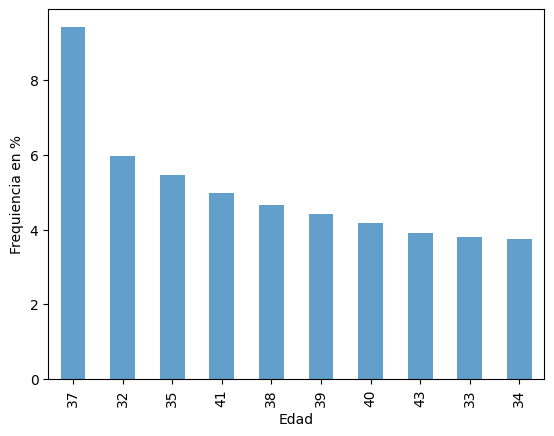

In [22]:
df_por_edad.plot.bar(alpha=0.7, xlabel="Edad", ylabel="Frequiencia en %")

<Axes: title={'center': 'Distribución por edad'}, xlabel='Edad', ylabel='Frecuencia'>

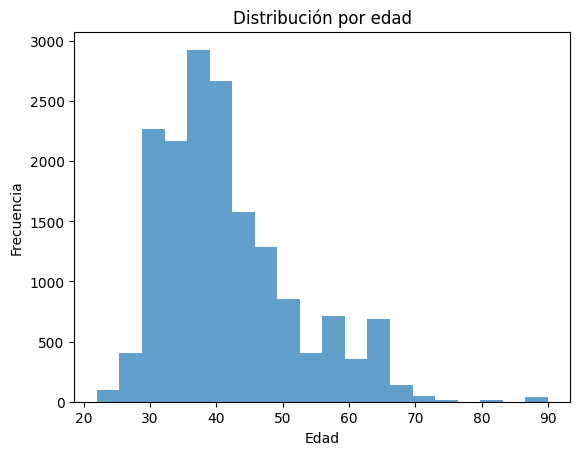

In [23]:
df_citibike["Age"].plot.hist(bins=20, title="Distribución por edad", xlabel="Edad", ylabel="Frecuencia", alpha=0.7)

# 4. Temporal Analysis
  - How does the number of trips vary by weekday?
  - Which month or season has the most rides?
  - What time of day do most trips start?

<Axes: xlabel='Weekday'>

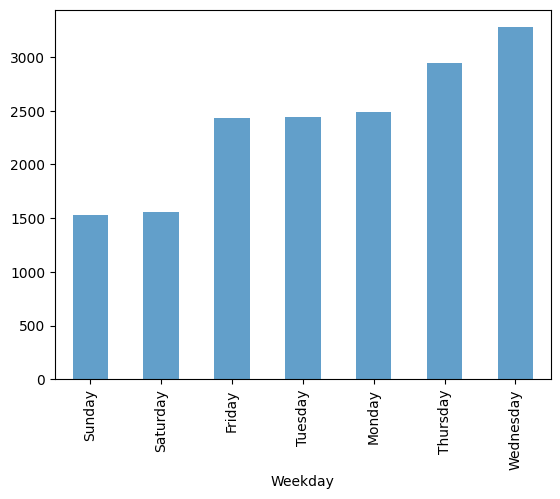

In [24]:
df_citibike.value_counts("Weekday").sort_values().plot.bar(alpha=0.7)

In [25]:
df_citibike.value_counts(["Month", "Season"]).unstack()

Season,Spring,Winter
Month,,
1,NaN,4587.0
2,NaN,4973.0
3,7114.0,NaN


In [26]:
df_citibike["Start Time"].dt.hour.value_counts()

Start Time
8     2191
18    1749
17    1673
7     1207
19    1174
9     1006
16     871
20     748
15     710
12     704
13     695
14     633
10     597
6      543
11     534
21     489
22     379
23     224
5      204
0      139
1       76
4       68
2       38
3       22
Name: count, dtype: int64

<Axes: >

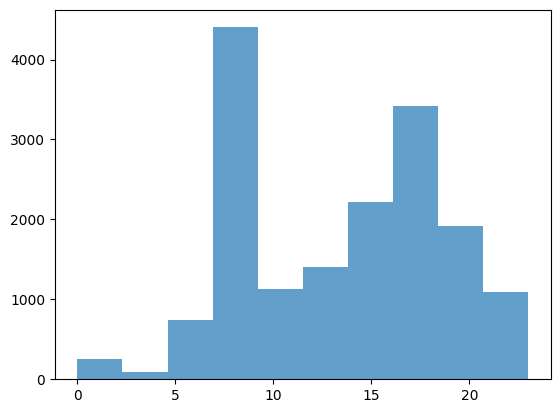

In [27]:
df_citibike["Start Time"].dt.hour.hist(bins=10, alpha=0.7, grid=False)

# 5. Geographic Analysis
  - Which station pairs (start → end) appear most often?
  - Are there any stations that appear only as start or only as end stations?

In [28]:
df_citibike.value_counts(["Start Station ID", "End Station ID"]).head(1)

Start Station ID  End Station ID
3203              3186              400
Name: count, dtype: int64

In [29]:
only_start=~df_citibike.loc[:,"Start Station ID"].isin(df_citibike.loc[:,"End Station ID"])
only_end=~df_citibike.loc[:,"End Station ID"].isin(df_citibike.loc[:,"Start Station ID"])

In [30]:
only_start.sum(), only_end.sum()

(np.int64(0), np.int64(10))

In [31]:
df_citibike.loc[only_end, "Start Station ID"].unique()

array([3267, 3198, 3186, 3202])

# 6. Temperature and Duration

### Is there any visible relationship between temperature and trip duration?

El primer paso para ver relación entre la temperatura y la duración del viaje es proyectar un mapa de calor de correlaciones entre columnas. A primera vista, parece que la relación lineal entre las dos variables es casi inexistente.

In [32]:
df_citibike.loc[:,["Birth Year","Age", "Trip Duration", "Trip_Duration_in_min", "Temperature", "Month"]].corr().style.background_gradient(cmap="RdBu", vmin=-1, vmax=1)

,Birth Year,Age,Trip Duration,Trip_Duration_in_min,Temperature,Month
Birth Year,1.000000,-1.000000,0.012903,0.012681,0.000012,0.016050
Age,-1.000000,1.000000,-0.012903,-0.012681,-0.000012,-0.016050
Trip Duration,0.012903,-0.012903,1.000000,0.998780,-0.036145,-0.003337
Trip_Duration_in_min,0.012681,-0.012681,0.998780,1.000000,-0.036179,-0.003744
Temperature,0.000012,-0.000012,-0.036145,-0.036179,1.000000,0.630751
Month,0.016050,-0.016050,-0.003337,-0.003744,0.630751,1.000000


Vamos a representar las dos variables sobre un scatter para explorar relaciones no lineales.

<Axes: xlabel='Duracion', ylabel='Temperatura'>

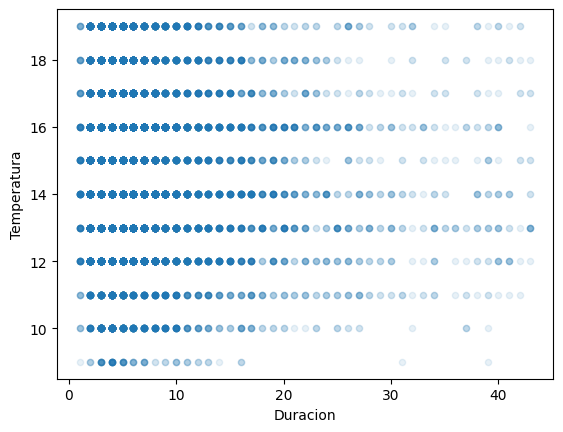

In [33]:
df_citibike.plot.scatter(x="Trip_Duration_in_min", y="Temperature", alpha=.1, xlabel="Duracion", ylabel="Temperatura")

Podemos ver en el gráfico que no existe una relación fuerte entre temperatura y duración del viaje, **la distribución es monogénea en todo el eje de la temperatura**. Para viualizarlo mejor, vamos a añadir rudido para difuminar estas formas de "grid" que vemos en los datos.

<Axes: xlabel='Duracion', ylabel='Temperatura'>

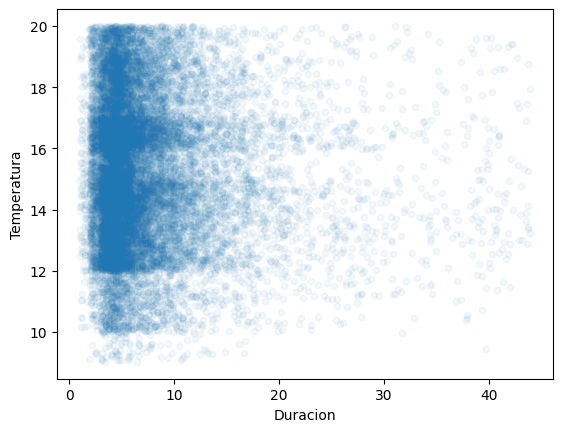

In [34]:
def jitter(df, column):
    rands=np.random.random(len(df))
    return df[column] + rands

(df_citibike.assign(
    Temperatura=lambda df:df.Temperature.where(df_citibike.Temperature == 0, jitter(df_citibike, "Temperature").clip(lower=0)),
    Duracion=lambda df:df["Trip_Duration_in_min"].where(df_citibike["Trip_Duration_in_min"] == 0, jitter(df_citibike, "Trip_Duration_in_min").clip(lower=0)))
    .plot.scatter(x="Duracion", y="Temperatura", alpha=.05))

### How does average trip duration vary by season?
Para esto simplemente encadenamos una operación de agrupación y agregamos sobre la media de la duración 

In [37]:
df_citibike.groupby("Season")[["Trip_Duration_in_min"]].mean()

,Trip_Duration_in_min
Season,
Spring,6.972589
Winter,7.165272


# 7. Summary and Interpretation
  - Write a short summary (5–10 lines) of your findings.
  - Mention patterns, anomalies, or interesting trends you observed.